Performing operations with  Operator  and  State vector

In [1]:
# Quantum Gate Operations, Simulation, and Proof that R = sqrt(X)
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt

In [ ]:
# Define basis states
zero = np.array([[1], [0]], dtype=complex)
one  = np.array([[0], [1]], dtype=complex)

In [3]:
# --- 2. Define standard quantum gates ---
X = np.array([[0, 1],
              [1, 0]], dtype=complex)          # Pauli-X (NOT)
Y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)         # Pauli-Y
Z = np.array([[1, 0],
              [0, -1]], dtype=complex)         # Pauli-Z
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]], dtype=complex)   # Hadamard
S = np.array([[1, 0],
              [0, 1j]], dtype=complex)         # Phase gate (π/2)
T = np.array([[1, 0],
              [0, np.exp(1j * np.pi / 4)]], dtype=complex)  # T gate (π/4)

In [4]:
# --- 3. Define R = H S H ---
R = H @ S @ H

# --- Helper Functions ---
def apply_gate(gate, state):
    """Apply a quantum gate and return new state + probabilities."""
    new_state = gate @ state
    probs = np.abs(new_state.flatten())**2
    return new_state, probs

def simulate_measurements(probs, shots=10000):
    """Simulate measurement outcomes based on probability amplitudes."""
    outcomes = np.random.choice([0, 1], size=shots, p=probs)
    counts = {0: int(np.sum(outcomes == 0)), 1: int(np.sum(outcomes == 1))}
    return counts


In [5]:
# --- 4. Apply each gate to |0> and simulate ---
gates = {
    "X": X, "Y": Y, "Z": Z, "H": H, "S": S, "T": T, "R = HSH": R
}

In [6]:
results = {}
shots = 10000
for name, gate in gates.items():
    final_state, probs = apply_gate(gate, zero)
    counts = simulate_measurements(probs, shots)
    results[name] = {
        "Final State": final_state,
        "Prob(|0>)": probs[0],
        "Prob(|1>)": probs[1],
        "Counts": counts
    }

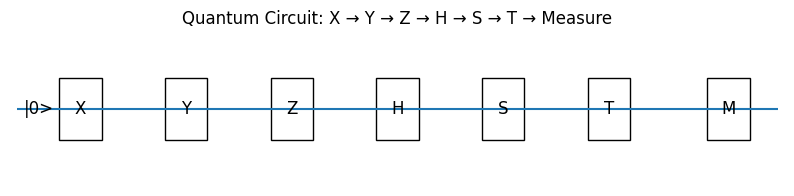

R = H S H :
 [[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]

R^2 :
 [[0.-0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

X gate :
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Is R^2 ≈ X ? -> True

R |0> = [[0.5+0.5j]
 [0.5-0.5j]]
Measurement Probabilities = [0.5 0.5]
Simulated Counts (10k shots) = {0: 5010, 1: 4990}


In [7]:
# --- 5. Draw simple circuit diagram ---
plt.figure(figsize=(10, 2))
ax = plt.gca()
ax.set_xlim(0, 11)
ax.set_ylim(0, 1)
ax.axis('off')

# Wire
ax.hlines(0.5, 0.1, 10.9, linewidth=1.5)

# Draw gates
positions = [(1, 'X'), (2.5, 'Y'), (4, 'Z'), (5.5, 'H'), (7, 'S'), (8.5, 'T')]
for x, label in positions:
    ax.add_patch(plt.Rectangle((x - 0.3, 0.5 - 0.2), 0.6, 0.4, fill=False))
    ax.text(x, 0.5, label, ha='center', va='center', fontsize=12)

# Initial and measurement
ax.text(0.2, 0.5, '|0>', va='center', fontsize=12)
ax.add_patch(plt.Rectangle((10.2 - 0.3, 0.5 - 0.2), 0.6, 0.4, fill=False))
ax.text(10.2, 0.5, 'M', ha='center', va='center', fontsize=12)
plt.title("Quantum Circuit: X → Y → Z → H → S → T → Measure")
plt.show()

# --- 6. Proof: R = H S H is sqrt(X) ---
R_squared = R @ R
print("R = H S H :\n", np.round(R, 4))
print("\nR^2 :\n", np.round(R_squared, 4))
print("\nX gate :\n", X)
print("\nIs R^2 ≈ X ? ->", np.allclose(R_squared, X))

# --- 7. Verify by applying R to |0> ---
r_state, r_probs = apply_gate(R, zero)
r_counts = simulate_measurements(r_probs, shots)
print("\nR |0> =", np.round(r_state, 4))
print("Measurement Probabilities =", r_probs)
print("Simulated Counts (10k shots) =", r_counts)
